# Euclid Galaxy Clusters Tutorial

This notebook provides a step-by-step tutorial for working with Euclid Q1 galaxy cluster data. We'll start by loading the cluster catalog and then explore how to extract related data from various archives.

## Table of Contents
1. [Loading the Cluster Catalog](#loading-the-cluster-catalog)
2. [Data Exploration](#data-exploration)
3. [IRSA Archive Data Extraction](#irsa-archive-data-extraction)
   - Imaging Data
   - Spectroscopic Data
   - Catalog Data


## 1. Loading the Cluster Catalog

Let's start by importing the necessary libraries and loading our Euclid Q1 cluster catalog.


In [1]:
# Install required packages if needed
#!pip install astroquery fsspec requests aiohttp

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.ipac.irsa import Irsa

from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy.visualization import ImageNormalize, PercentileInterval, AsinhStretch
import fsspec

import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

In [2]:
# Load the Euclid Q1 cluster catalog
df = pd.read_csv('euclid_q1_clusters.csv')

print(f"Dataset shape: {df.shape}")
df

Dataset shape: (35, 13)


,NAME,ID,RAPZWav,DecPZWav,RAAMICO,DecAMICO,zPZWav,zAMICO,zspec,Nzspec,SNRPZWav,SNRAMICO,lambdaPmem
0,EUCL-Q1-CL J041113.88−481928.2,EUCL-Q1-CL-0,62.8089,-48.3245,62.8067,-48.3245,0.41,0.40,-,-,40.81,89.38,241.47±4.79
1,EUCL-Q1-CL J041724.90−474849.7,EUCL-Q1-CL-1,64.3521,-47.8150,64.3554,-47.8127,0.55,0.56,-,-,24.20,60.43,115.26±4.13
2,EUCL-Q1-CL J033747.63−275112.8,EUCL-Q1-CL-2,54.4491,-27.8497,54.4478,-27.8574,0.49,0.48,0.535±0.004,10,23.43,51.72,81.36±4.74
3,EUCL-Q1-CL J032321.22−275105.3,EUCL-Q1-CL-3,50.8371,-27.8549,50.8397,-27.8481,0.42,0.41,-,-,22.61,46.43,56.14±4.73
4,EUCL-Q1-CL J040151.05−502848.7,EUCL-Q1-CL-4,60.4686,-50.4780,60.4568,-50.4824,0.43,0.42,-,-,22.38,30.49,99.03±4.45
5,EUCL-Q1-CL J040558.72−491549.3,EUCL-Q1-CL-5,61.5018,-49.2626,61.4875,-49.2648,0.31,0.30,-,-,22.21,52.78,131.57±4.40
6,EUCL-Q1-CL J040655.77−480504.2,EUCL-Q1-CL-6,61.7282,-48.0850,61.7365,-48.0840,0.69,0.70,-,-,22.14,34.27,99.21±3.72
7,EUCL-Q1-CL J041343.51−480756.5,EUCL-Q1-CL-7,63.4322,-48.1305,63.4304,-48.1343,1.47,1.46,-,-,21.74,37.54,22.95±2.24
8,EUCL-Q1-CL J180607.67+635615.6,EUCL-Q1-CL-8,271.5285,63.9386,271.5355,63.9367,1.32,1.33,-,-,21.53,57.26,23.13±2.05
9,EUCL-Q1-CL J040509.84−464902.4,EUCL-Q1-CL-9,61.2955,-46.8097,61.2865,-46.8250,0.42,0.38,-,-,20.48,37.06,99.49±4.55


## 2. Random Cluster Selection

Let's randomly select one cluster from our catalog to work with for the rest of this tutorial.


In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# Randomly select one cluster
cluster = df.sample(n=1).iloc[0]
cluster

NAME          EUCL-Q1-CL J041109.36−490953.7
ID                             EUCL-Q1-CL-26
RAPZWav                               62.791
DecPZWav                             -49.165
RAAMICO                               62.787
DecAMICO                            -49.1649
zPZWav                                  0.42
zAMICO                                  0.35
zspec                                      -
Nzspec                                     -
SNRPZWav                               16.42
SNRAMICO                               31.19
lambdaPmem                        31.01±5.12
Name: 26, dtype: object

## 3. IRSA Data Querying

Now let's query IRSA (Infrared Science Archive) for data related to our selected cluster. We'll need to install and import the necessary packages for astronomical data querying.


In [6]:
# Create SkyCoord object and define search radius
cluster_coord = SkyCoord(ra=cluster['RAPZWav'], dec=cluster['DecPZWav'], unit='deg')
search_radius = 2.0  # arcminutes

# Query Euclid Q1 MER mosaics
mer_images = Irsa.query_sia(pos=(cluster_coord, search_radius * u.arcmin), collection='euclid_DpdMerBksMosaic')

# Filter for Euclid facility and science dataproduct_subtype
mer_images = mer_images[(mer_images['facility_name'] == 'Euclid') & (mer_images['dataproduct_subtype'] == 'science')]
mer_images

s_ra,s_dec,facility_name,instrument_name,dataproduct_subtype,calib_level,dataproduct_type,energy_bandpassname,energy_emband,obs_id,s_resolution,em_min,em_max,em_res_power,proposal_title,access_url,access_format,access_estsize,t_exptime,s_region,obs_collection,obs_intent,algorithm_name,facility_keywords,instrument_keywords,environment_photometric,proposal_id,proposal_pi,proposal_project,target_name,target_type,target_standard,target_moving,target_keywords,obs_release_date,s_xel1,s_xel2,s_pixel_scale,position_timedependent,t_min,t_max,t_resolution,t_xel,obs_publisher_did,s_fov,em_xel,pol_states,pol_xel,cloud_access,o_ucd,upload_row_id
deg,deg,,,,,,,,,arcsec,m,m,,,,,kbyte,s,deg,,,,,,,,,,,,,,,,,,arcsec,,d,d,s,,,deg,,,,,,
float64,float64,object,object,object,int16,object,object,object,object,float64,float64,float64,float64,object,object,object,int64,float64,object,object,object,object,object,object,bool,object,object,object,object,object,bool,bool,object,object,int64,int64,float64,bool,float64,float64,float64,int64,object,float64,int64,object,int64,object,object,int64
62.63341442956414,-48.99998611110919,Euclid,VIS,science,3,image,VIS,Optical,102020537_VIS,0.16,5.5e-07,9e-07,2.1,Euclid on-the-fly,https://irsa.ipac.caltech.edu/ibe/data/euclid/q1/MER/102020537/VIS/EUC_MER_BGSUB-MOSAIC-VIS_TILE102020537-878E4F_20241018T194644.345077Z_00.00.fits,image/fits,1520646,--,POLYGON ICRS 63.05034436108819 -48.73256939108926 62.216484725755464 -48.7325692391627 62.21199609674667 -49.26588444801848 63.054832536771556 -49.26588460282817 63.05034436108819 -48.73256939108926,euclid_DpdMerBksMosaic,SCIENCE,mosaic,,,--,,,,,field,--,False,,2025-05-01 00:00:00,19800,19200,0.100000000000008,False,--,--,--,--,ivo://irsa.ipac/euclid_DpdMerBksMosaic?102020537_VIS/VIS,0.5416025603091074,--,,--,"{""aws"": {""bucket_name"": ""nasa-irsa-euclid-q1"", ""key"":""q1/MER/102020537/VIS/EUC_MER_BGSUB-MOSAIC-VIS_TILE102020537-878E4F_20241018T194644.345077Z_00.00.fits"", ""region"": ""us-east-1""}}",,1
62.63341442956414,-48.99998611110919,Euclid,NISP,science,3,image,H,Infrared,102020537_NISP,0.1026,1.372e-06,2e-06,2.7,Euclid on-the-fly,https://irsa.ipac.caltech.edu/ibe/data/euclid/q1/MER/102020537/NISP/EUC_MER_BGSUB-MOSAIC-NIR-H_TILE102020537-3AC4_20241018T170846.308609Z_00.00.fits,image/fits,1520646,--,POLYGON ICRS 63.05034436108819 -48.73256939108926 62.216484725755464 -48.7325692391627 62.21199609674667 -49.26588444801848 63.054832536771556 -49.26588460282817 63.05034436108819 -48.73256939108926,euclid_DpdMerBksMosaic,SCIENCE,mosaic,,,--,,,,,field,--,False,,2025-05-01 00:00:00,19800,19200,0.100000000000008,False,--,--,--,--,ivo://irsa.ipac/euclid_DpdMerBksMosaic?102020537_NISP/H,0.5416025603091074,--,,--,"{""aws"": {""bucket_name"": ""nasa-irsa-euclid-q1"", ""key"":""q1/MER/102020537/NISP/EUC_MER_BGSUB-MOSAIC-NIR-H_TILE102020537-3AC4_20241018T170846.308609Z_00.00.fits"", ""region"": ""us-east-1""}}",,1
62.63341442956414,-48.99998611110919,Euclid,NISP,science,3,image,J,Infrared,102020537_NISP,0.094,1.146e-06,1.372e-06,5.6,Euclid on-the-fly,https://irsa.ipac.caltech.edu/ibe/data/euclid/q1/MER/102020537/NISP/EUC_MER_BGSUB-MOSAIC-NIR-J_TILE102020537-DE6C59_20241018T170510.624196Z_00.00.fits,image/fits,1520646,--,POLYGON ICRS 63.05034436108819 -48.73256939108926 62.216484725755464 -48.7325692391627 62.21199609674667 -49.26588444801848 63.054832536771556 -49.26588460282817 63.05034436108819 -48.73256939108926,euclid_DpdMerBksMosaic,SCIENCE,mosaic,,,--,,,,,field,--,False,,2025-05-01 00:00:00,19800,19200,0.100000000000008,False,--,--,--,--,ivo://irsa.ipac/euclid_DpdMerBksMosaic?102020537_NISP/J,0.5416025603091074,--,,--,"{""aws"": {""bucket_name"": ""nasa-irsa-euclid-q1"", ""key"":""q1/MER/102020537/NISP/EUC_MER_BGSUB-MOSAIC-NIR-J_TILE102020537-DE6C59_20241018T170510.624196Z_00.00.fits"", ""region"": ""us-east-1""}}",,1
62.63341442956414,-48.99998611110919,Euclid,NISP,science,3,image,Y,Infrared,102020537_NISP,0.0878,9.2e-07,1.146e-06,4.6,Euclid on-the-fly,https://irsa.ipac.

In [ ]:
# Cutout parameters
im_cutout = 3.0 * u.arcmin
coords_cutout = cluster_coord

# Get URLs for each band
vis_url = mer_images[mer_images['energy_bandpassname'] == 'VIS'][0]['access_url']
y_url = mer_images[mer_images['energy_bandpassname'] == 'Y'][0]['access_url']
j_url = mer_images[mer_images['energy_bandpassname'] == 'J'][0]['access_url']
h_url = mer_images[mer_images['energy_bandpassname'] == 'H'][0]['access_url']

# Create cutouts
cutouts = {}
for band, url in [('VIS', vis_url), ('Y', y_url), ('J', j_url), ('H', h_url)]:
    hdu = fits.open(url, use_fsspec=True)
    cutout = Cutout2D(hdu[0].data, position=coords_cutout, size=im_cutout, wcs=WCS(hdu[0].header))
    cutouts[band] = cutout.data
    hdu.close()


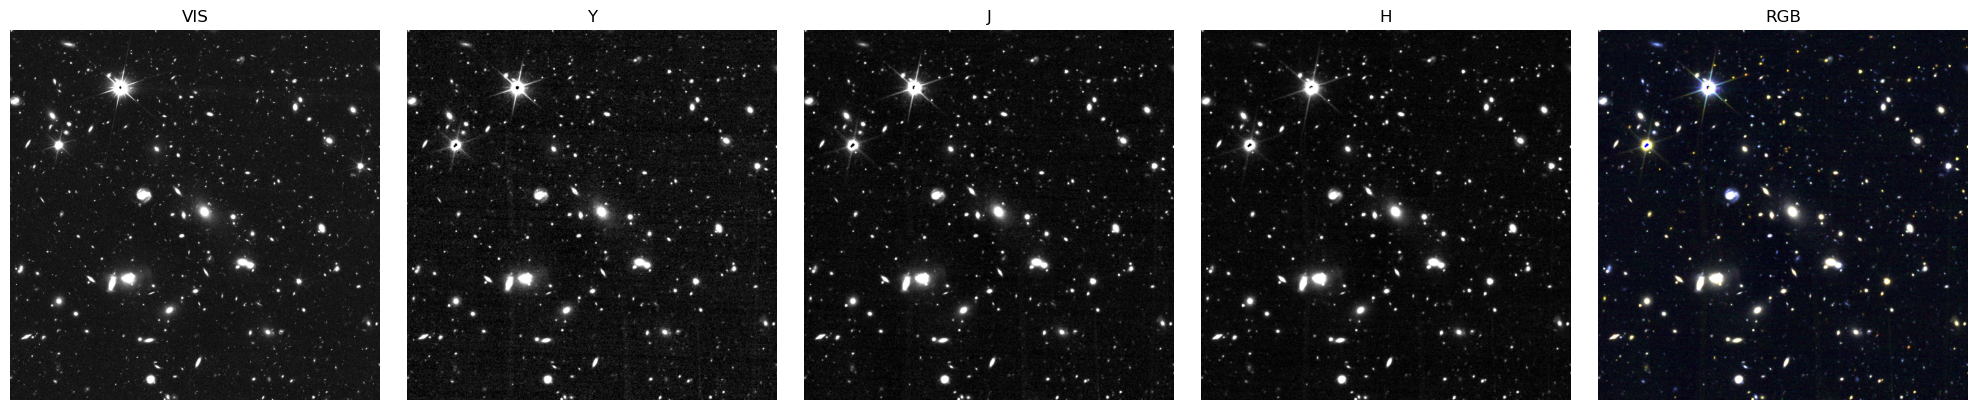

In [15]:

# Remove outliers and normalize each band individually
def remove_outliers_and_normalize(data, lower_percentile=5, upper_percentile=99):
    vmin = np.percentile(data, lower_percentile)
    vmax = np.percentile(data, upper_percentile)
    data_clipped = np.clip(data, vmin, vmax)
    data_norm = (data_clipped - vmin) / (vmax - vmin)
    return data_norm

# Normalize each band
norm_cutouts = {}
for band in ['VIS', 'Y', 'J', 'H']:
    norm_cutouts[band] = remove_outliers_and_normalize(cutouts[band])

# Create RGB (R=H, G=J, B=VIS)
rgb = np.dstack([norm_cutouts['H'], norm_cutouts['J'], norm_cutouts['VIS']])

# Plot 5 columns: VIS, Y, J, H, RGB
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
bands = ['VIS', 'Y', 'J', 'H']
titles = ['VIS', 'Y', 'J', 'H', 'RGB']

for i, (band, title) in enumerate(zip(bands, titles)):
    axes[i].imshow(norm_cutouts[band], cmap='gray', origin='lower')
    axes[i].set_title(title)
    axes[i].axis('off')

axes[4].imshow(rgb, origin='lower')
axes[4].set_title('RGB')
axes[4].axis('off')

plt.tight_layout()
plt.show()